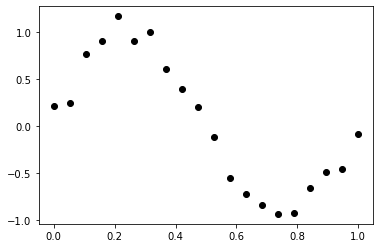

In [201]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 1, 20)
N = np.random.normal(0,0.1,20)
pi = np.pi
Y= np.sin(x * 2 * np.pi)
y = Y + N

plt.plot(x, y, 'o', color='black')
plt.show()

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures as pf
from sklearn import linear_model as lm
from sklearn.metrics import mean_squared_error


x_test = x[0::2]
x_train = x[1::2]
y_test = y[0::2]
y_train = y[1::2]

p0 [0.05882216]
p1 [-1.60822505  0.86293468]
p6 [ 2.38123980e+00 -4.84603462e+01  1.12959248e+02 -7.69874375e+01
  3.88421894e+00  6.23038782e+00  4.10445833e-02]
p9 [-5.20494049e+03  2.33816423e+04 -4.40562979e+04  4.51997942e+04
 -2.74430944e+04  1.00522874e+04 -2.15410416e+03  2.27795590e+02
 -3.13749986e+00  7.16083870e-02]
[[0.05882215863495725, -1.6082250472240378, 21.23911492844807, -5204.940485475485], [nan, 0.862934682246976, -32.05914281568987, 23381.64231069086], [nan, nan, 11.012126709298922, -44056.297919027995], [nan, nan, -0.06888047708062811, 45199.79423524974], [nan, nan, nan, -27443.094387348872], [nan, nan, nan, 10052.287371045026], [nan, nan, nan, -2154.1041632855045], [nan, nan, nan, 227.7955899124119], [nan, nan, nan, -3.1374998649586634], [nan, nan, nan, 0.07160838698126062]]


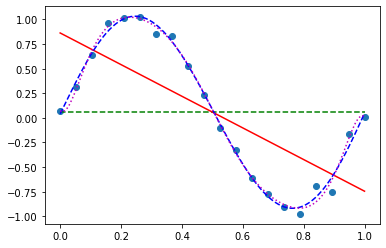

In [170]:
import numpy as np
# x = np.array([0,1,2,3,4,5])
# y = np.array([0,0.8,0.9,0.1,-0.8,-1])
# print(x)
# print(y)

p0 = np.polyfit(x,y,0)
p1 = np.polyfit(x,y,1)
p6 = np.polyfit(x,y,6)
p9 = np.polyfit(x,y,9)
print('p0',p0)
print('p1',p1)
print('p6',p6)
print('p9',p9)

# poly_tr_x = poly.fit_transform(np.array(x_train).reshape(-1, 1))
# poly_ts_x = poly.fit_transform(np.array(x_test).reshape(-1, 1))

import matplotlib.pyplot as plt
plt.plot(x,y,'o')
xp = np.linspace(0,1,100)
# xp =x
plt.plot(xp,np.polyval(p0,xp),'g--')
plt.plot(xp,np.polyval(p1,xp),'r-',label="M1")
plt.plot(xp,np.polyval(p6,xp),'b--',label="M6")
plt.plot(xp,np.polyval(p9,xp),'m:',label="M9")

final = []

final.append([p0[0],p1[0],p3[0],p9[0]])
final.append([np.NaN,p1[1],p3[1],p9[1]])
final.append([np.NaN,np.NaN,p3[2],p9[2]])
final.append([np.NaN,np.NaN,p3[3],p9[3]])
final.append([np.NaN,np.NaN,np.NaN,p9[4]])
final.append([np.NaN,np.NaN,np.NaN,p9[5]])
final.append([np.NaN,np.NaN,np.NaN,p9[6]])
final.append([np.NaN,np.NaN,np.NaN,p9[7]])
final.append([np.NaN,np.NaN,np.NaN,p9[8]])
final.append([np.NaN,np.NaN,np.NaN,p9[9]])

print(final)


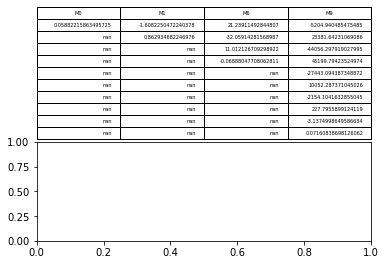

In [188]:
import numpy as np
import matplotlib.pyplot as plt

def train(x,y,degree,alpha):
    model = make_pipeline(PolynomialFeatures(degree),
                                Ridge(alpha=alpha, solver='auto'))
    model.fit(x[:, np.newaxis], y)
    weights = model.steps[-1][1].coef_.copy()
    weights[0] = model.steps[-1][1].intercept_
    return weights


    
# print(models)

fig, axs =plt.subplots(2,1)
clust_data = final
# print(clust_data[0])
collabel=("M0", "M1", "M6", "M9")
axs[0].axis('tight')
axs[0].axis('off')
the_table = axs[0].table(cellText=clust_data,colLabels=collabel,loc='center')

In [166]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
# %load RMS.py

def RMS(X,y,deg):
    poly_reg = PolynomialFeatures(degree=deg)
    X_poly = poly_reg.fit_transform(X.reshape(-1, 1))

    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, np.array(y).reshape(-1, 1))
    y_pred = lin_reg.predict(X_poly)
    # plt.figure(figsize=(10,8));
    # plt.scatter(X, y);
    # plt.plot(X, y_pred);
    # print(X_poly)
    # print(r2_score(y, y_pred))
    return r2_score(y, y_pred)

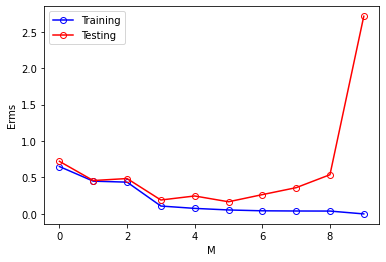

In [206]:
# from RMS import RMS
# modelos = [linear_model(x) for x in range(10)]
models = [0,1,2,3,4,5,6,7,8,9]
trainerr = []
testerr = []
for i in models:
  poly = pf(degree=i)
  poly_x_train = poly.fit_transform(np.array(x_train).reshape(-1, 1))
  poly_x_test = poly.fit_transform(np.array(x_test).reshape(-1, 1))
  pr = lm.LinearRegression()
  pr.fit(poly_x_train, y_train)
  pred_tr = pr.predict(poly_x_train)
  pred_ts = pr.predict(poly_x_test)
  trainerr.append((mean_squared_error(y_train, pred_tr))**0.5)
  testerr.append((mean_squared_error(y_test, pred_ts))**0.5)


# print (models)
# models = [0,1,2,3,4,5,6,7,8,9]
# m6 = train(x_test,y_test,6,1)
# print(m6)
# testerr = [RMS(x_test, y_test,degree) for degree in models]
# trainerr = [RMS(x_train, y_train,degree) for degree in models]

# print(testerr,trainerr)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(models, trainerr, color='blue', marker='o', markerfacecolor='none', label='Training')
ax.plot(models, testerr, color='red', marker='o', markerfacecolor='none',label='Testing')
ax.set_ylabel('Erms')
ax.set_xlabel('M')
ax.legend(loc='upper left')
plt.show()

100 (100,) (100,)


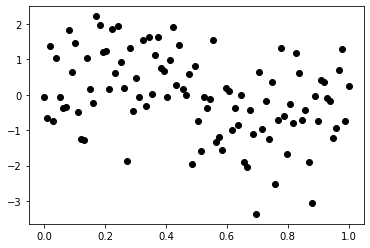

In [220]:
x100 = np.linspace(0, 1, 100)
N100 = np.random.normal(size=100)
Y100= []
y100 = []

for xi in x100:
    Y100.append(2*pi*xi)
Y100= np.sin(Y100)

for yi,n in zip(Y100,N100):
#     print(y,n)
    y100.append(yi + n)
#     y[idx] = 
# print(sample)

# x = np.arange(0,4*np.pi,0.1)   
# y = np.sin(x)
print(len(y100),np.array(x100).shape,np.array(y100).shape)
plt.plot(np.array(x100), np.array(y100), 'o', color='black')
plt.show()

x_test100 = x[0::2]
x_train100 = x[1::2]
y_test100 = y[0::2]
y_train100 = y[1::2]


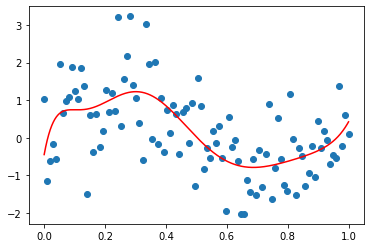

In [217]:
p9 = np.polyfit(x100,y100,9)
plt.plot(x100,y100,'o')
xpoly = np.linspace(0,1,1000)
# xp =x
# plt.plot(xp,np.polyval(p0,xp),'g--')
plt.plot(xpoly,np.polyval(p9,xpoly),'r-',label="M9")

In [224]:
from sklearn.linear_model import Ridge
def ridge_regression(x, y, alpha):
    print(x[0],y[0])
    #Fit the model
    model = Ridge(alpha=alpha)
    model.fit(x, y)
#     x = x.reshape(-1, 1) 
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(x,y)
    y_pred = ridgereg.predict(x)

    plt.tight_layout()
    plt.plot(x,y_pred)
    plt.plot(x,y,'.')
    plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-y)**2)
    ret = rss
#     ret.extend([ridgereg.intercept_])
#     ret.extend(ridgereg.coef_)
    return ret

[1.00000000e+00 5.26315789e-02 2.77008310e-03 1.45793847e-04
 7.67336039e-06 4.03861073e-07 2.12558460e-08 1.11872874e-09
 5.88804597e-11 3.09897157e-12] 0.24430020034907354
[1.00000000e+00 5.26315789e-02 2.77008310e-03 1.45793847e-04
 7.67336039e-06 4.03861073e-07 2.12558460e-08 1.11872874e-09
 5.88804597e-11 3.09897157e-12] 0.24430020034907354
[1.00000000e+00 5.26315789e-02 2.77008310e-03 1.45793847e-04
 7.67336039e-06 4.03861073e-07 2.12558460e-08 1.11872874e-09
 5.88804597e-11 3.09897157e-12] 0.24430020034907354
[1.00000000e+00 5.26315789e-02 2.77008310e-03 1.45793847e-04
 7.67336039e-06 4.03861073e-07 2.12558460e-08 1.11872874e-09
 5.88804597e-11 3.09897157e-12] 0.24430020034907354
[1.00000000e+00 5.26315789e-02 2.77008310e-03 1.45793847e-04
 7.67336039e-06 4.03861073e-07 2.12558460e-08 1.11872874e-09
 5.88804597e-11 3.09897157e-12] 0.24430020034907354
[1.00000000e+00 5.26315789e-02 2.77008310e-03 1.45793847e-04
 7.67336039e-06 4.03861073e-07 2.12558460e-08 1.11872874e-09
 5.88804

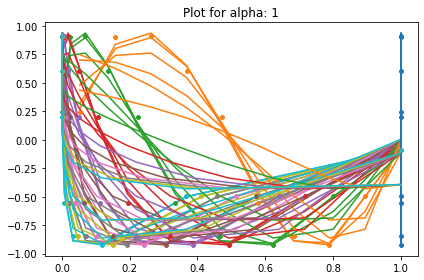

In [225]:

lamdas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
poly = pf(degree=9)
poly_x_train100 = poly.fit_transform(x_train100.reshape(-1, 1))
poly_x_test100 = poly.fit_transform(x_test100.reshape(-1, 1))
# testreg = [ridge_regression(x_test100, y_test100,lamda) for lamda in lamdas]
trainreg = [ridge_regression(poly_x_train100, y_train100,lamda) for lamda in lamdas]
print(trainreg)

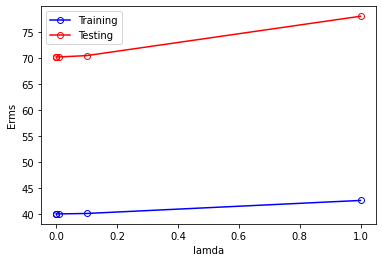

In [155]:


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(lamdas, trainreg, color='blue', marker='o', markerfacecolor='none', label='Training')
ax.plot(lamdas, testreg, color='red', marker='o', markerfacecolor='none',label='Testing')
ax.set_ylabel('Erms')
ax.set_xlabel('lamda')
ax.legend(loc='upper left')
plt.show()